## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling, Assessing, Cleaning</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will explore the Loan dataset that contains 113,937 rows and 81 columns.
I will pick some of the variables that are related to Default to analyze them.
At the begining i will use some data wrangling and cleaning, and then explore relationships between variables.

<a id = 'wrangling'></a>
## Data Cleaning and Wrangling

In [74]:
# import all nessesray packages
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [75]:
# Loading the dataset
DF_Loan = pd.read_csv("C:/Users/Hany/Desktop/prosperLoanData.csv")

In [76]:
DF_Loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [77]:
# descriptive statistics
print(DF_Loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [78]:
DF_Loan[DF_Loan.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


> Firstly observing NO duplicated rows

#### What is the structure of dataset?

>There are 113,937 entries in the dataset with 81 features. We have numeric variables, categorical variables, boolean and date. Variables like ProsperRating (Alpha) and IncomeRange can be ordered factor variables with the following levels:

>ProsperRating (Alpha): AA, A, B, C, D, E, HR (best to worth)
>
>IncomeRange: Not employed, \\$0, \\$1-\\$24,999, \\$25,000-\\$49,999, \\$50,000-\\$74,999, \\$75,000-\\$99,999, \\$100,000+

> Lot of null values found in some variables, such as variables prosperrating and prosperscore, which I'll need to take care of later.
>
> Some variables are not needed for my research and will have to be truncated, such as listingkey, listingnumber, of other identifiers.

#### What is the main factor of interest in your dataset?

> My point of interest is what factors are most suitable for knowing whether a loan would fail or not, which is the LoanStatus variable.

#### What other factors do you think will help support your investigation into your main factor?

> Expecting the variables related to borrowers' personal situation would have effect on default, such as EmploymentStatus, CreditScoreRangeLower/Upper, DelinquenciesLast7Years, IncomeRange, etc.

In [81]:
# Making copy of our dataset to use in cleaning
DF_Loan_Copy = DF_Loan.copy()

In [82]:
# Eeplace space with underscore for convenience and Change column names to lowercase.
DF_Loan_Copy.columns = map(str.lower, DF_Loan_Copy.columns)
DF_Loan_Copy.columns = DF_Loan_Copy.columns.str.replace(' ', '_')

In [83]:
# Remove columns not needed for my research analysis.
DF_Loan_Copy.drop(columns = ['listingkey', 'listingnumber', 'groupkey', 'loankey', 'loannumber', 'memberkey'], axis=1, inplace = True)

In [84]:
# Handle the nulls in our dataset
Cg_Columns = DF_Loan_Copy.select_dtypes(include = 'object').columns

In [85]:
DF_Loan_Copy[Cg_Columns] = DF_Loan_Copy[Cg_Columns].fillna('unknown')
DF_Loan_Copy.select_dtypes(include = 'object').isnull().sum()

listingcreationdate        0
creditgrade                0
loanstatus                 0
closeddate                 0
prosperrating_(alpha)      0
borrowerstate              0
occupation                 0
employmentstatus           0
datecreditpulled           0
firstrecordedcreditline    0
incomerange                0
loanoriginationdate        0
loanoriginationquarter     0
dtype: int64

In [86]:
# Remove borrowerapr column
DF_Loan_Copy.drop(columns = 'borrowerapr', inplace = True)

In [87]:
# Remove Estimatedeffectiveyield, estimatedloss and estimatedreturn 
DF_Loan_Copy.drop(columns = ['estimatedeffectiveyield', 'estimatedloss', 'estimatedreturn'], inplace = True)

In [88]:
# Remove prosperrating_(numeric), and prosperscore.
DF_Loan_Copy.drop(columns = ['prosperrating_(numeric)', 'prosperscore'], inplace = True)

In [89]:
DF_Loan_Copy.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)

In [91]:
DF_Loan_Copy[DF_Loan_Copy['debttoincomeratio'].isnull()][:10]

,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerrate,lenderyield,prosperrating_(alpha),listingcategory_(numeric),borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,currentlyingroup,datecreditpulled,creditscorerangelower,creditscorerangeupper,firstrecordedcreditline,currentcreditlines,opencreditlines,totalcreditlinespast7years,openrevolvingaccounts,openrevolvingmonthlypayment,inquirieslast6months,totalinquiries,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,revolvingcreditbalance,bankcardutilization,availablebankcardcredit,totaltrades,tradesneverdelinquent_(percentage),tradesopenedlast6months,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,totalprosperloans,totalprosperpaymentsbilled,ontimeprosperpayments,prosperpaymentslessthanonemonthlate,prosperpaymentsonemonthpluslate,prosperprincipalborrowed,prosperprincipaloutstanding,scorexchangeattimeoflisting,loancurrentdaysdelinquent,loanfirstdefaultedcyclenumber,loanmonthssinceorigination,loanoriginalamount,loanoriginationdate,loanoriginationquarter,monthlyloanpayment,lp_customerpayments,lp_customerprincipalpayments,lp_interestandfees,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
40,2014-01-27 12:02:57.523000000,unknown,60,Current,unknown,0.1725,0.1625,C,1,WA,Other,Self-employed,276.0,False,False,2014-01-25 10:47:25,680.0,699.0,1985-12-20 00:00:00,10.0,9.0,28.0,10,1233.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,61284.0,0.46,69166.0,28.0,1.00,2.0,NaN,"$100,000+",False,12750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,15000,2014-01-29 00:00:00,Q1 2014,374.81,374.8100,162.14,212.6700,-12.33,0.00,0.00,0.00,0.0,1.0,0,0,0.0,3
69,2014-01-25 12:07:54.537000000,unknown,60,Current,unknown,0.1139,0.1039,A,1,IL,Investor,Self-employed,12.0,True,True,2014-01-25 11:51:41,700.0,719.0,1995-08-01 00:00:00,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.000000,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,NaN,0,NaN,2,9000,2014-01-29 00:00:00,Q1 2014,197.44,194.6315,115.99,78.6415,-7.15,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
78,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.1700,0.1600,unknown,3,CA,Realtor,Full-time,68.0,True,False,2008-06-29 23:13:04.860000000,720.0,739.0,1995-11-29 00:00:00,14.0,14.0,26.0,9,962.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,33572.0,0.73,9355.0,24.0,1.00,1.0,NaN,$0,False,0.000000,1.0,6.0,6.0,0.0,0.0,7750.0,6725.84,0.0,1918,9.0,68,4800,2008-07-08 00:00:00,Q3 2008,171.13,684.5200,418.38,266.1400,-15.66,0.00,4381.62,4381.62,0.0,1.0,0,0,0.0,115
100,2013-01-25 11:48:26.040000000,unknown,36,Chargedoff,2013-08-30 00:00:00,0.3134,0.3034,HR,13,CA,Other,Not employed,12.0,False,False,2013-01-11 12:10:13,720.0,739.0,2000-09-10 00:00:00,3.0,3.0,10.0,3,56.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5641.0,0.22,19359.0,4.0,1.00,1.0,NaN,Not employed,False,0.000000,1.0,11.0,7.0,4.0,0.0,5000.0,3802.10,-47.0,314,7.0,14,4000,2013-01-30 00:00:00,Q1 2013,172.76,345.5200,144.77,200.7500,-6.41,0.00,3855.23,3855.23,0.0,1.0,0,0,0.0,73
103,2012-04-17 11:58:52.270000000,unknown,36,Chargedoff,2013-03-22 00:00:00,0.2287,0.2187,D,3,CO,Truck Driver,Self-employed,29.0,True,False,2012-04-17 11:58:46,680.0,699.0,1993-10-26 00:00:00,9.0,7.0,21.0,1,699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28228.0,0.98,502.0,18.0,0.77,0.0,NaN,"$50,000-74,999",False,5000.000000,1.0,29.0,28.0,1.0,0.0,15000.0,3813.03,-94.0,384,12.0,23,15000,2012-04-19 00:00:00,Q2 2012,579.63,3968.8900,1119.05,2849.8400,-49.41,-813.65,13880.95,13880.95,1600.0,1.0,0,0,0.0,21
105,2011-08-16 20:24:41.713000000,unknown,36,Chargedoff,2012-04-01 00:00:00,0.2699,0.2599,D,6,WI,Sales - Commission,Employed,1.0,False,False,2011-08-01 09:40:14,640.0,659.0,2003-05-05 00:00:00,4.0,4.0,40.0,3,58.0,2.0,5.0,1.0,0.0,7.0,0.0,0.0,2130.0,0.64,1079.0,

In [92]:
# Calculatinh debt-income ratio using monthlyloanpayment and statedmonthlyincome columns
DF_Loan_Copy['debttoincomeratio'].fillna(DF_Loan_Copy['monthlyloanpayment'] / DF_Loan_Copy['statedmonthlyincome'], inplace = True)

In [93]:
DF_Loan_Copy['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)

In [94]:
DF_Loan_Copy['debttoincomeratio'].fillna(DF_Loan_Copy['monthlyloanpayment'] / (DF_Loan_Copy['statedmonthlyincome'] + 1), inplace = True)

In [95]:
DF_Columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']

In [96]:
for i in DF_Columns:
    DF_Loan_Copy[i].fillna(0, inplace = True)

In [97]:
DF_Loan_Copy.drop(columns = ['scorexchangeattimeoflisting', 'lp_customerprincipalpayments','loanfirstdefaultedcyclenumber', \
                          'lp_customerpayments', 'lp_interestandfees', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments',\
                          'lp_grossprincipalloss', 'lp_servicefees', 'lp_collectionfees'], inplace = True)

In [19]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 59 columns):
listingcreationdate                    106290 non-null object
creditgrade                            106290 non-null object
term                                   106290 non-null int64
loanstatus                             106290 non-null object
closeddate                             106290 non-null object
borrowerrate                           106290 non-null float64
lenderyield                            106290 non-null float64
prosperrating_(alpha)                  106290 non-null object
listingcategory_(numeric)              106290 non-null int64
borrowerstate                          106290 non-null object
occupation                             106290 non-null object
employmentstatus                       106290 non-null object
employmentstatusduration               106290 non-null float64
isborrowerhomeowner                    106290 non-null bool
currentlyingroup      

<a id = 'univariate'></a>
## Univariate Exploration

>looking at the main variable of interest - loanstatus.

In [98]:
DF_Loan_Copy.loanstatus.value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: loanstatus, dtype: int64

> The factors a more likely to have a strong enough relationship to provoke a default or not defalut. Giving that there are only 2 loan status: 1 & 0, where 1 = Default and 0 = No default, but the value counts have more than 2 status

In [99]:
DF_Loan_analysis = DF_Loan_Copy[DF_Loan_Copy['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]

In [100]:
DF_Loan_analysis['default'] = np.where(DF_Loan_analysis['loanstatus'] == 'Completed', 0, 1)

Text(0.5, 1.0, 'The Default Percentage Chart')

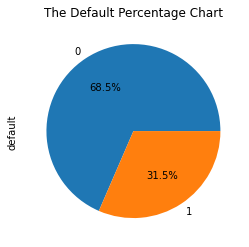

In [101]:
DF_Loan_analysis['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('The Default Percentage Chart')

> From the pie chart of loan excluding the current status, 68.5% were completed and 31.5% were default

In [102]:
DF_Loan_analysis['borrowerrate'].describe()

count    48949.000000
mean         0.203111
std          0.082599
min          0.000000
25%          0.135500
50%          0.198000
75%          0.269900
max          0.360000
Name: borrowerrate, dtype: float64

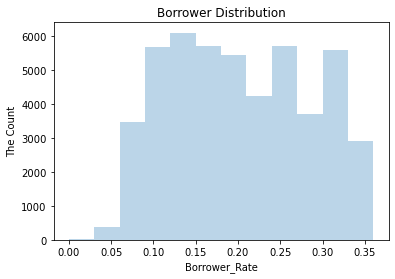

In [106]:
# univariate plots of column borrowerrate
colors = sb.color_palette()[0]
bins = np.arange(0, DF_Loan_analysis['borrowerrate'].max() + 0.01, 0.03);
plt.hist(data = DF_Loan_analysis, x = 'borrowerrate', bins = bins, alpha = 0.3, color = colors);
plt.title('Borrower Distribution');
plt.xlabel('Borrower_Rate');
plt.ylabel('The Count');

> The borrower rate has 3 spikes, 2 at 0.25 and 0.31, and the third spike being barely noticeable at 0.13 and most of the borrower rate lies between 0.07 and 0.30.

In [107]:
pros_cat = ['unknown', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
DF_Loan_analysis['prosperrating_(alpha)'] = pd.Categorical(DF_Loan_analysis['prosperrating_(alpha)'], categories = prosperrating_cat, ordered = True)

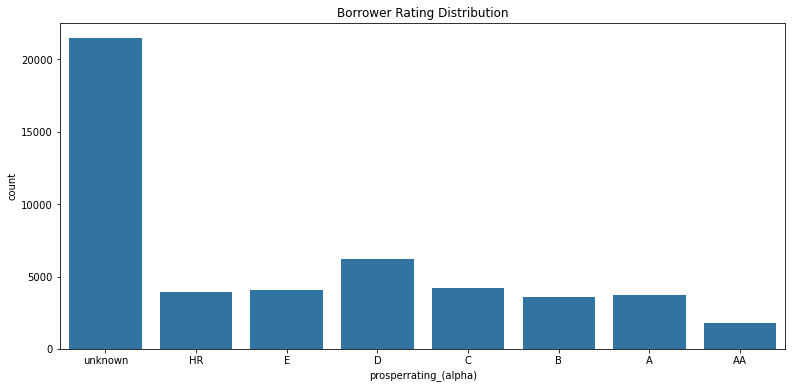

In [108]:
plt.subplots(figsize = (13, 6))
sb.countplot(data = DF_Loan_analysis, x = 'prosperrating_(alpha)', color = colors);
plt.title("Borrower Rating Distribution");

> There's a lot of data on the unknown row, this should be as a result of the inaccuracy of data from before July 2009. I will ignore that for now.

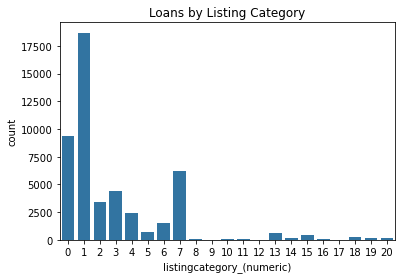

In [109]:
sb.countplot(data = DF_Loan_analysis, x = 'listingcategory_(numeric)', color = colors);
plt.title('Loans by Listing Category');

> Categories have more loans, with the highest count on category 1

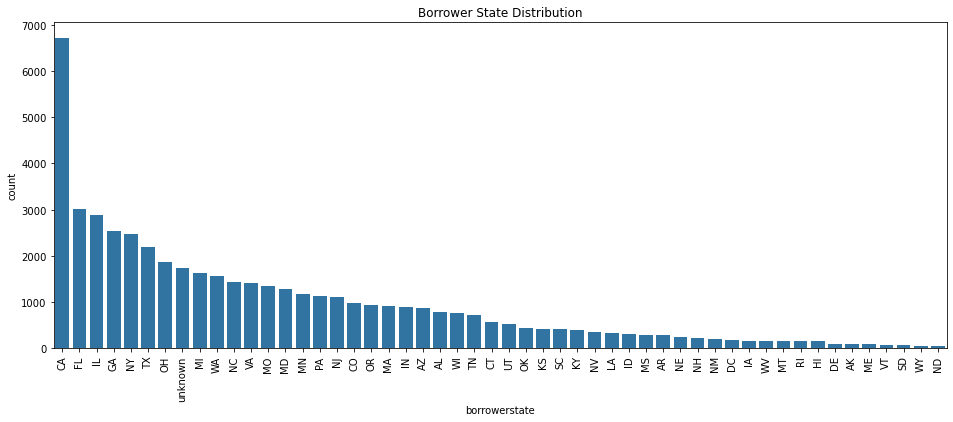

In [110]:
state = DF_Loan_analysis['borrowerstate'].value_counts().index
plt.subplots(figsize = (16, 6));
sb.countplot(data = DF_Loan_analysis, x = 'borrowerstate', color = colors, order = state);
plt.xticks(rotation = 90);
plt.title("Borrower State Distribution");

> The highest number of borrowers are from california as per the borrower's state distribution.

In [111]:
# Let's analyze the employmentstatus variable
type_counts = DF_Loan_analysis['employmentstatus'].value_counts()
type_ord = type_counts.index
n_emp = DF_Loan_analysis['employmentstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_propn = max_type_count / n_emp
tick_props = np.arange(0, max_propn, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

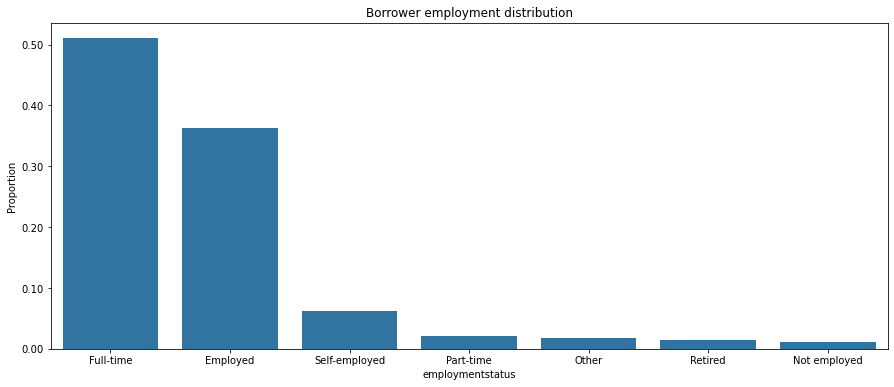

In [113]:
plt.subplots(figsize = (15, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = DF_Loan_analysis, x = 'employmentstatus', color = colors, order = type_ord);
plt.yticks(tick_props * n_emp, tick_names);
plt.ylabel('Proportion');
plt.title("Borrower employment distribution");

> From the chart, we deduce that most of the borrowers have jobs. A very small percentage of borrowers are either retired and unemployed, with the highest proportion of borrowers having full time jobs

In [114]:
# univariate plots of incomerange 
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
DF_Loan_analysis['incomerange'] = pd.Categorical(DF_Loan_analysis['incomerange'], categories = income_classes, ordered = True)

In [115]:
income_counts = DF_Loan_analysis['incomerange'].value_counts()
n_income = DF_Loan_analysis['incomerange'].value_counts().sum()
max_income_count = income_counts[0]
max_prop_income = max_income_count / n_income
tick_props = np.arange(0, max_prop_income, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

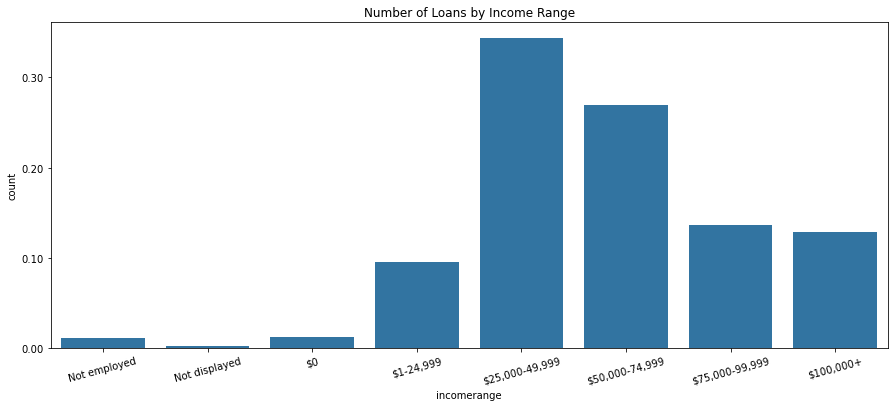

In [116]:
plt.subplots(figsize = (15, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = DF_Loan_analysis, x = 'incomerange', color = colors);
plt.yticks(tick_props * n_income, tick_names) 
plt.xticks(rotation = 15);
plt.title('Number of Loans by Income Range');

> From the chart, we can see most borrowers are income earners (HAVE JOBS). This confirms the chart above. Also, we see the highest number of borrowers are found in the income range \\$25,000 - \\$$49,999.

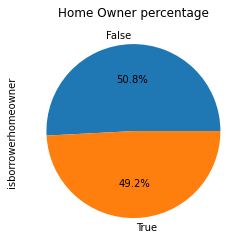

In [117]:
# Find out the percentage of borrowers who are home owners
DF_Loan_analysis['isborrowerhomeowner'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Home Owner percentage');

> There is a 50%:50% difference between the borrowers that are home owners and that don't have homes.

In [118]:
# Let's analyze the credit score
credit_counts = DF_Loan_analysis['creditscorerangelower'].value_counts()
n_credit = DF_Loan_analysis['creditscorerangelower'].value_counts().sum()
max_credit_count = income_counts[0]
max_prop_credit = max_credit_count / n_credit
tick_props = np.arange(0, max_prop_credit, 0.025)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

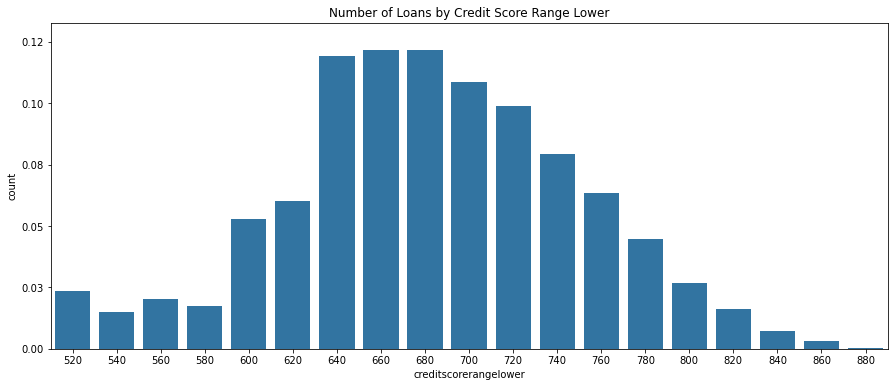

In [119]:
DF_Loan_analysis['creditscorerangelower'] = DF_Loan_analysis['creditscorerangelower'].apply(int)
plt.subplots(figsize = (15, 6))
sb.countplot(data = DF_Loan_analysis, x = 'creditscorerangelower', color = colors)
plt.yticks(tick_props * n_income, tick_names);
plt.title('Number of Loans by Credit Score Range Lower')
plt.ylim(0, 6500);

> Credit score range is more concentrated between 640 - 720, very few borrowers have credit score lower than 580.

> Debt to Income Ratio Distrib. is very skewed so I will have to transform it using the log transformation method

In [120]:
DF_Loan_analysis['debttoincomeratio'].describe()

count    48949.000000
mean         5.711041
std         57.857881
min          0.000000
25%          0.120000
50%          0.200000
75%          0.310000
max       6291.865167
Name: debttoincomeratio, dtype: float64

In [121]:
np.log10(DF_Loan_analysis['debttoincomeratio'].describe())

count    4.689744
mean     0.756715
std      1.762363
min          -inf
25%     -0.920819
50%     -0.698970
75%     -0.508638
max      3.798779
Name: debttoincomeratio, dtype: float64

> Most of the borrowers have debt to income ratio in range (0, 1), some have the ratio even higher than 100.

In [122]:
np.log(DF_Loan_analysis['totalcreditlinespast7years'].describe())

count    10.798534
mean      3.249056
std       2.658270
min       0.693147
25%       2.708050
50%       3.178054
75%       3.526361
max       4.912655
Name: totalcreditlinespast7years, dtype: float64

> Many of the borrowers have credit lines between 10 and 50.

#### Is income correlated with borrower rate?

$25,000-49,999    16826
$50,000-74,999    13184
$75,000-99,999     6681
$100,000+          6299
$1-24,999          4668
$0                  607
Not employed        546
Not displayed       138
Name: incomerange, dtype: int64


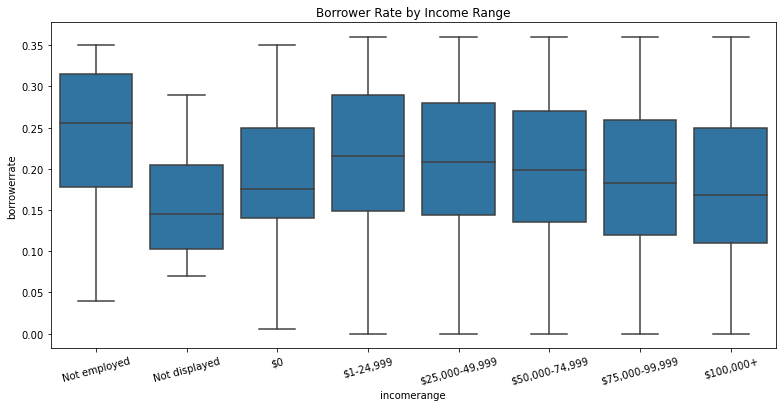

In [123]:
plt.subplots(figsize = (13, 6));
sb.boxplot(data = DF_Loan_analysis, x = 'incomerange', y = 'borrowerrate', color = colors);
plt.xticks(rotation = 15);
plt.title('Borrower Rate by Income Range');
print(income_counts)

> When income > 1,notice that the average borrower rate tends to go down as imcome range goes up. Also, the not employed group tends to have higher borrowerate than any other groups, and this makes sense.  \\$0 groups have relatively lowest borrowerrate than other groups. Probably because the sample size of 'not displayed' is quite little, only 138 rows. But this doesn't explain why \\$0 has low borrowerrate.

#### Is default correlated with borrowerrate?

Text(0.5, 1.0, 'Borrower Rate by Default')

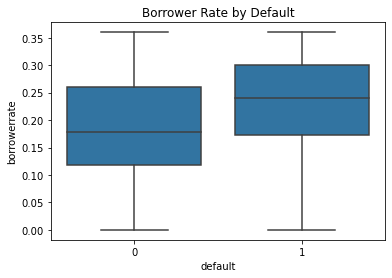

In [125]:
sb.boxplot(data = DF_Loan_analysis, x = 'default', y = 'borrowerrate', color = colors);
plt.title('Borrower Rate by Default')

> Looks like borrowerrate is higher in the default group, what could be the cause?

#### Is credit score correlated with borrower rate?

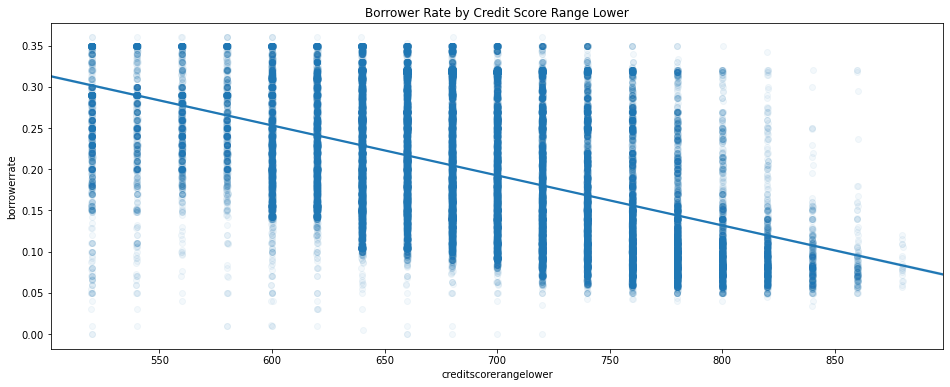

In [126]:
plt.figure(figsize = (16, 6))
sb.regplot(data = DF_Loan_analysis, x = 'creditscorerangelower', y = 'borrowerrate', truncate = False, x_jitter = 0.3, scatter_kws={'alpha':1/20});
plt.xlabel('creditscorerangelower')
plt.ylabel('borrowerrate');
plt.title('Borrower Rate by Credit Score Range Lower');

> The borrowerrate does seem to have a correlation with credit score range lower! There is a negative correlation between these two variables.

#### Which income group has most defaults?

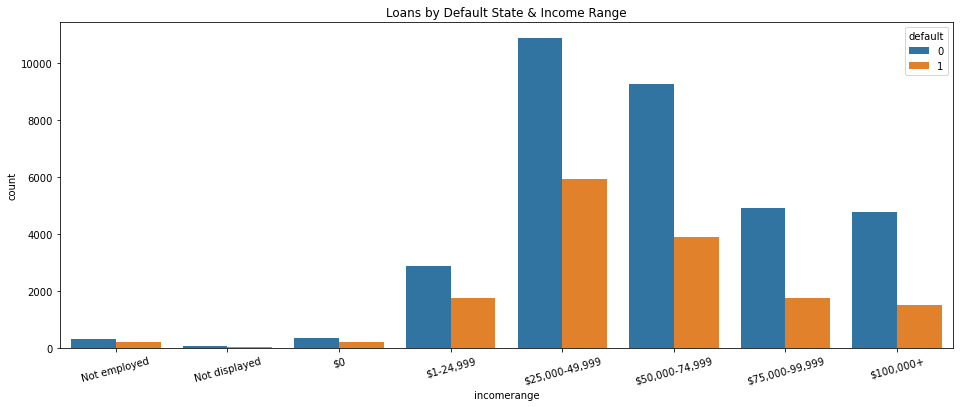

In [127]:
# Let's look at correlation between incomerange and default too.
plt.subplots(figsize = (16, 6))
sb.countplot(data = DF_Loan_analysis, x = 'incomerange', hue = 'default');
plt.xticks(rotation = 15);
plt.title('Loans by Default State & Income Range');

> From the graph above, we can know that more defaulted loans came from the \\$25,000 - \\$49,999 range. But how about the default rate? Let's calculate the default rate of each income range.

#### Which income group has the highest default rate?

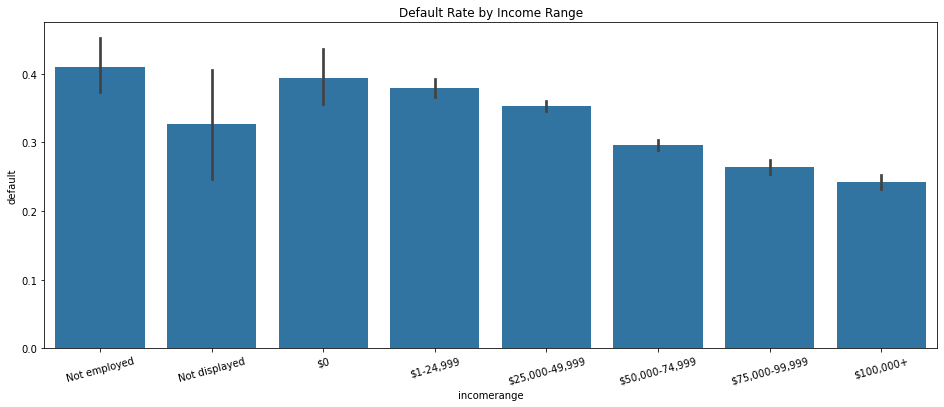

In [128]:
plt.figure(figsize = (16, 6))
sb.barplot(data = DF_Loan_analysis, x = 'incomerange', y = 'default', color = colors);
plt.xticks(rotation = 15);
plt.title('Default Rate by Income Range');

> `Not Employed` group and `$0` group have the highest default rate even though group \\$25,000 - \\$49,999 have the highest borrowerrate, which kind of makes more sense. Even though \\$0 group has lower borrowerrate, they still are more likely to default on loan payments. But then, Not display group's average default rate is lower than \\$0 - \\$49,999.

#### Do certain loan categories have higher default rate?

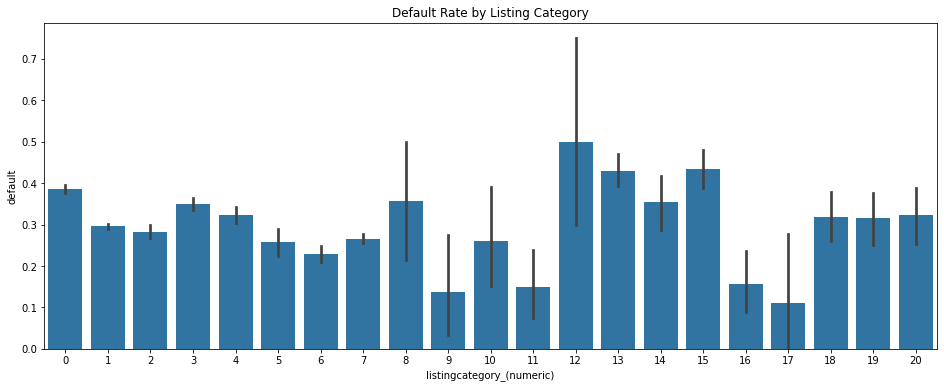

In [129]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = DF_Loan_analysis, x = 'listingcategory_(numeric)', y = 'default', color = colors);
plt.title('Default Rate by Listing Category');

> Some type of loans do have a higher default rate averagely.

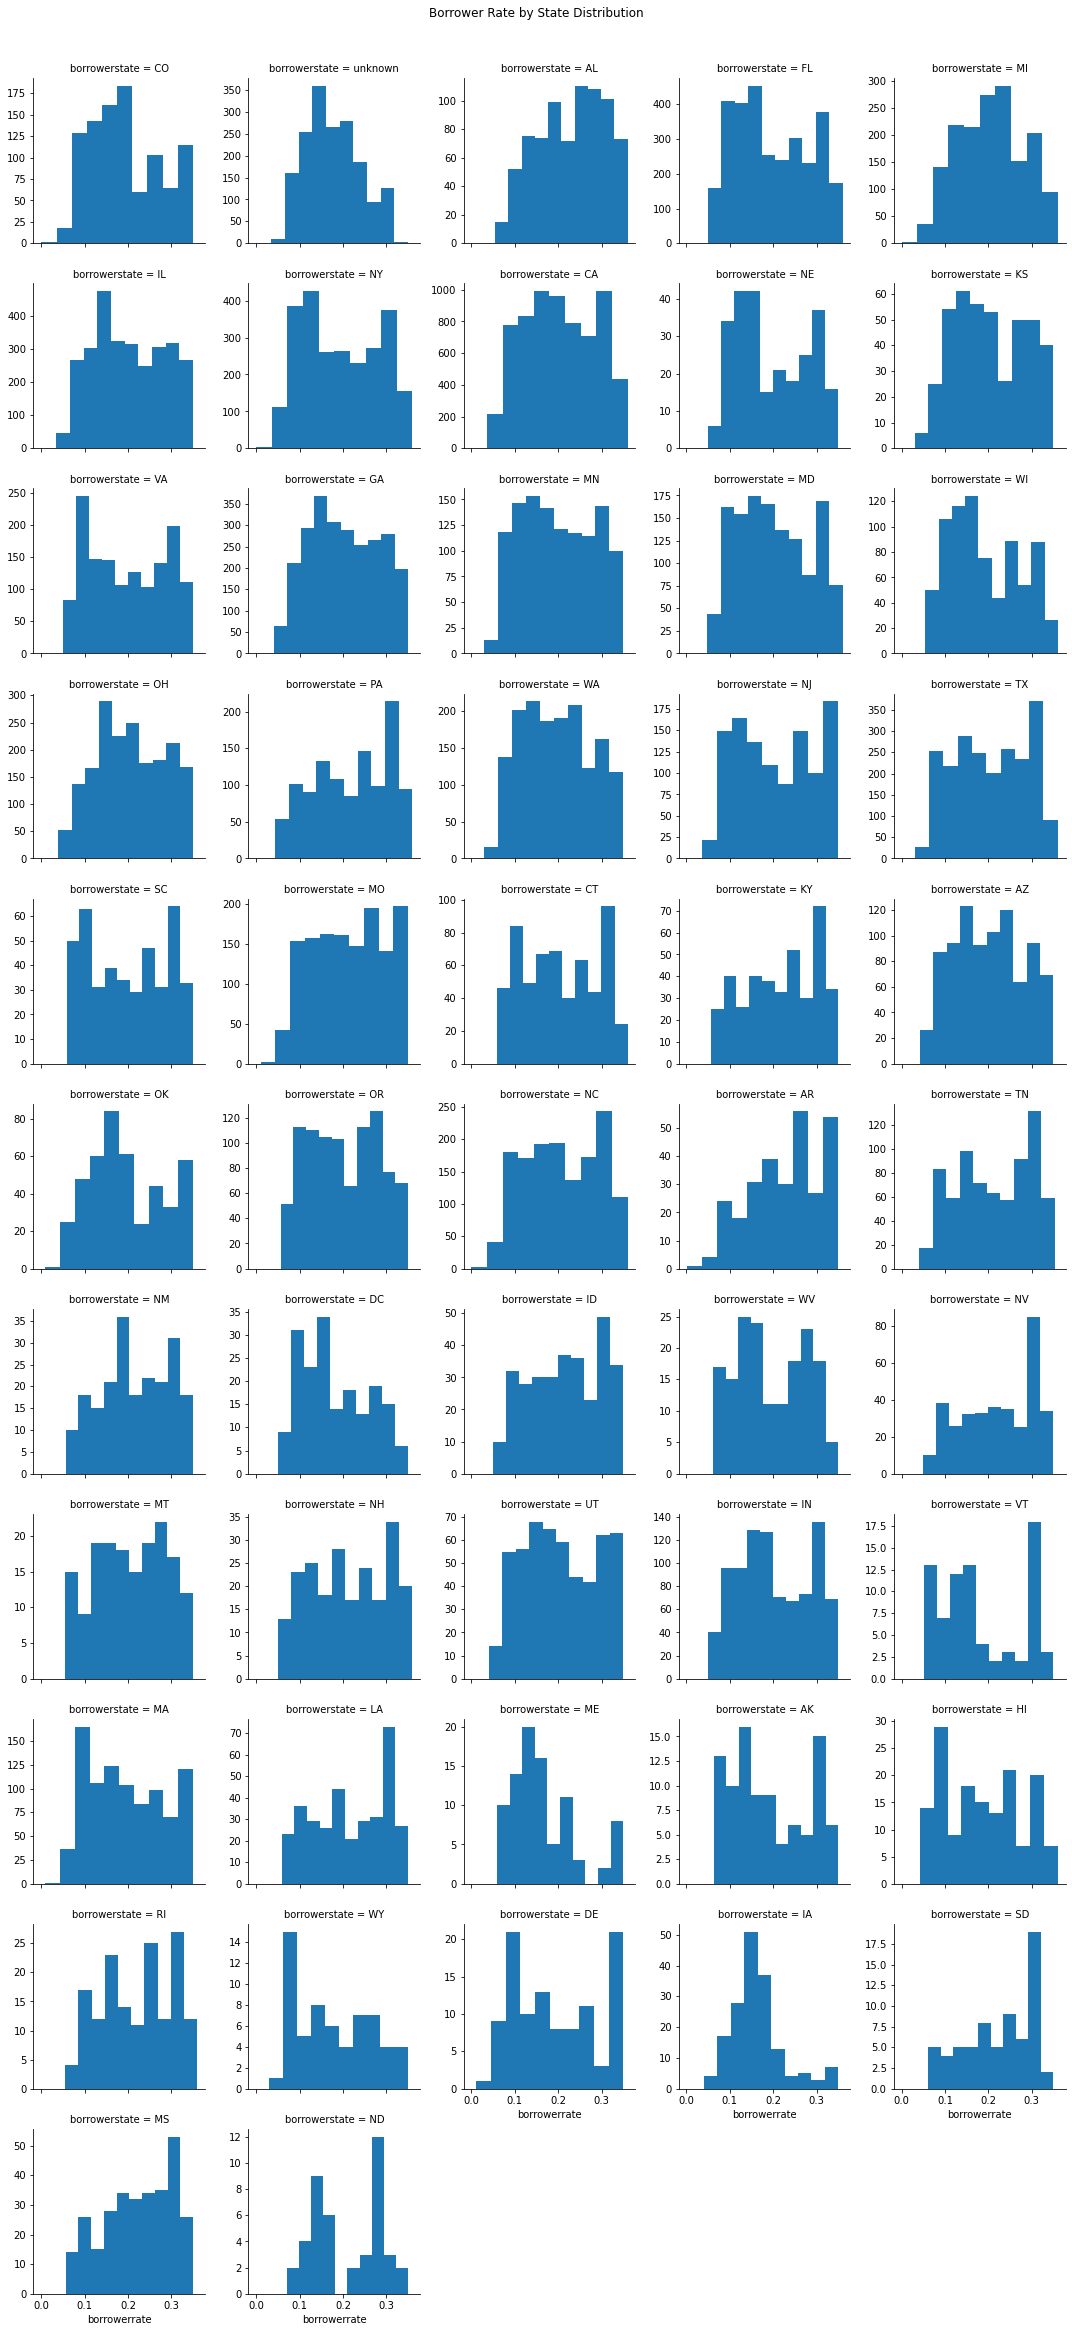

In [130]:
g = sb.FacetGrid(data = DF_Loan_analysis, col = 'borrowerstate', col_wrap=5, sharey=False)
g.map(plt.hist, 'borrowerrate');
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Borrower Rate by State Distribution');

> We observe that there are significant differences between default rates across states.

#### Is there any correlation between homeowner and default rate?

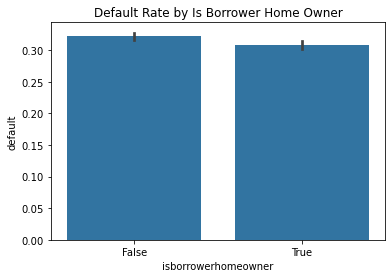

In [131]:
sb.barplot(data = DF_Loan_analysis, x = 'isborrowerhomeowner', y = 'default', color = colors);
plt.title('Default Rate by Is Borrower Home Owner');

> There is a very little difference between default rate and home owner

#### Is there a correlation between credit score lower range and default rate?

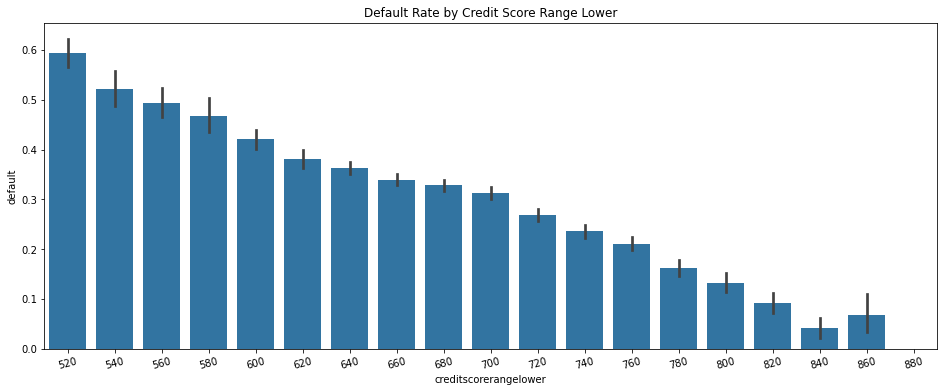

In [132]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = DF_Loan_analysis, x = 'creditscorerangelower', y = 'default', color = colors);
plt.xticks(rotation = 15);
plt.title('Default Rate by Credit Score Range Lower');

The is a strong negative correlation between credit score lower range and default rate. However, there is an anomally at creditscorerangelower = 860

<a id = 'multivariate'></a>
## Multivariate Exploration

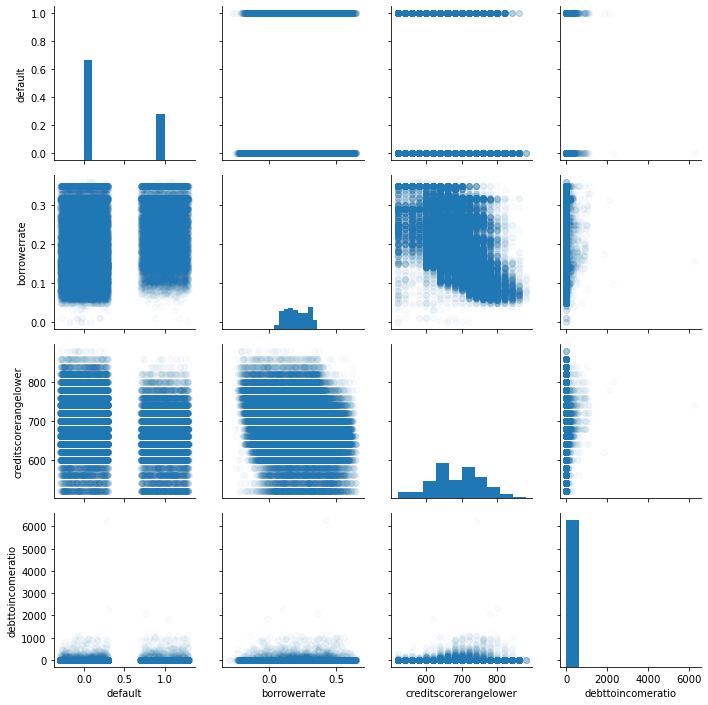

In [133]:
g = sb.PairGrid(data = DF_Loan_analysis, vars = ['default', 'borrowerrate', 'creditscorerangelower', \
                                              'debttoincomeratio'])
g.map_diag(plt.hist)
g.map_offdiag(sb.regplot, truncate = False, x_jitter = 0.3, scatter_kws = {'alpha': 1/40}, fit_reg = False);

> From the graph, for each credit score, the borrower rate for the default group are more likely to be higher.

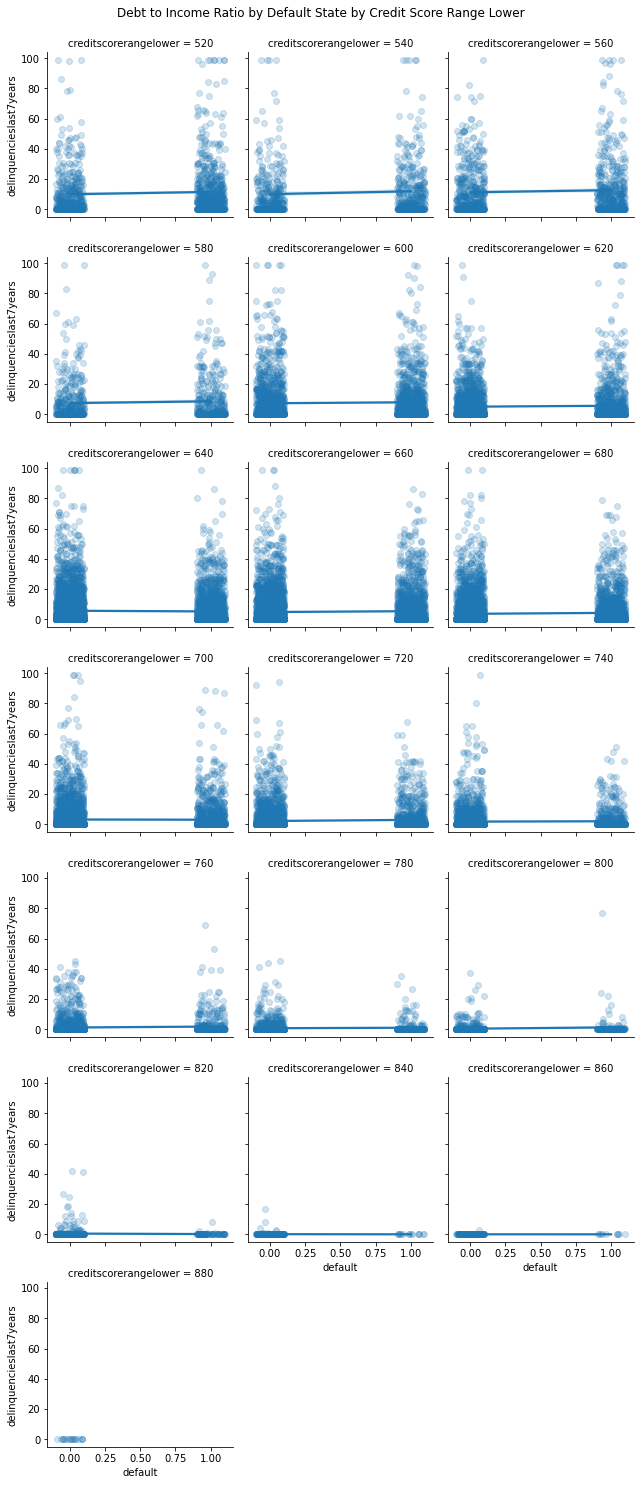

In [134]:
g = sb.FacetGrid(data = DF_Loan_analysis, col = 'creditscorerangelower', col_wrap = 3);
g.map(sb.regplot, 'default', 'delinquencieslast7years', x_jitter = 0.1, scatter_kws = {'alpha': 1/5});
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Debt to Income Ratio by Default State by Credit Score Range Lower');

> There's not much difference between these two groups in terms of delinquencies in the last 7 years.

<a id = 'conclusion'></a>
## Conclusion

While exploring the correlation between Default and some other variables of interest, after univariate, bivariate, and multivarite analysis,I've found out that loan defaults are tied with certain factors: borrower rate, income range, credit score, and debt to income ratio. 